   0  28.22401669
1  2    35.820843
2  3    36.870969
3  4    30.984885
4  5    38.782213
5  6    38.467533


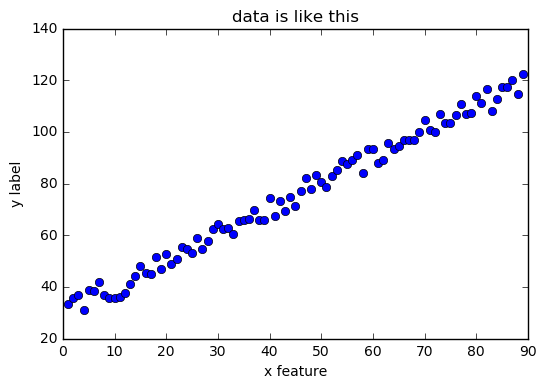

In [4]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
data = pd.read_csv('http://oheum0xlq.bkt.clouddn.com/Newton.csv')
print(data.ix[1:5, :])
dataArray = np.array(data)
x = dataArray[:, 0]
y = dataArray[:, 1]
plt.plot(x, y, 'o')
plt.title('data is like this')
plt.xlabel('x feature')
plt.ylabel('y label')
plt.show()

1
89
[[ 2.]
 [ 3.]
 [ 4.]
 [ 5.]]


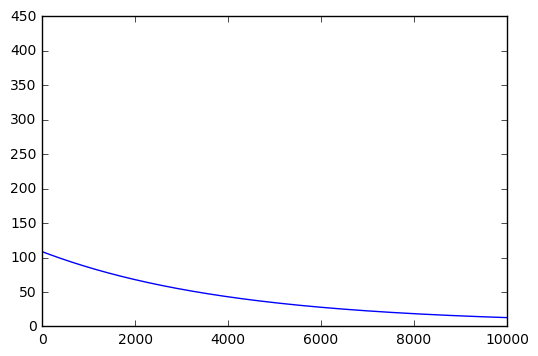

In [2]:
def Myfunction_BGD(data, alpha, numIter, eplise):
    ''' Batch Gradient Descent
    :type data: array  
    :param data: contain x and y(label)
    :type step: int/float numeric
    :param step: length of step when update the theta
    '''
    nCol = data.shape[1]-1
    nRow = data.shape[0]
    print nCol
    print nRow
    x = data[:, :nCol]
    print x[1:5, :]
    z = np.ones(nRow).reshape(nRow, 1)
    x = np.hstack((z, x))  ## vstack merge like rbind in R; hstack like cbind in R;
    y = data[:, (nCol)].reshape(nRow, 1)
    #theta = np.random.random(nCol+1).reshape(nCol+1, 1)
    theta = np.ones(nCol+1).reshape(nCol+1, 1)
    i = 0
    costJ = []
    #eplise = 0.4
    while i < numIter:
        H = np.dot(x,theta)
        J = (np.sum((y-H)**2))/(2*nRow)
        #print('Itering %d ;cost is:%f' %(i+1,J))
        costJ.append(J)
        Gradient = (np.dot(np.transpose(y-H),x))/nRow
        Gradient = Gradient.reshape(nCol+1, 1)
        if np.sum(np.fabs(Gradient))<= eplise:
            return theta, costJ
        else:
            ## update
            theta = theta + alpha * Gradient
        i = i + 1
    return theta, costJ


## test ##

num = 10000
theta, costJ = Myfunction_BGD(dataArray, alpha=0.0005, numIter=num, eplise=0.4) ##

#print theta
klen = len(costJ)
leng = np.linspace(1, klen, klen)
plt.plot(leng, costJ)
plt.show()

1
89
[[ 2.]
 [ 3.]
 [ 4.]
 [ 5.]]
[[ 29.62922102]
 [  1.01628263]]


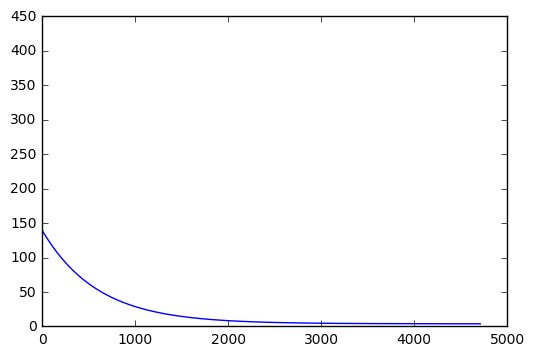

In [32]:
def Myfunction_SGD(data, alpha, numIter, eplise):
    ''' Stochastic Gradient Descent
    :type data: array  
    :param data: contain x and y(label)
    :type step: int/float numeric
    :param step: length of step when update the theta
    '''
    nCol = data.shape[1]-1
    nRow = data.shape[0]
    print nCol
    print nRow
    x = data[:, :nCol]
    print x[1:5, :]
    z = np.ones(nRow).reshape(nRow, 1)
    x = np.hstack((z, x))  ## vstack merge like rbind in R; hstack like cbind in R;
    #print 'x',x
    y = data[:, (nCol)].reshape(nRow, 1)
    #theta = np.random.random(nCol+1).reshape(nCol+1, 1)
    theta = np.ones(nCol+1).reshape(nCol+1, 1)
    #print 'theta0',theta
    Loop = 0
    costJ = []
    while Loop <numIter:
        H = np.dot(x,theta)
        J = np.sum((y-H)**2)/(2*nRow)
        #print('Itering %d ;cost is:%f' %(Loop+1,J))
        costJ.append(J)
        i = 0
        while i <nRow:
            t0 = theta
            #Gradient = (y[i] - np.dot(x[i], theta)) * x[i]
            #print 'y[i]',y[i]
            #print 'x[i]',x[i]
            #print 'theat',theta
            #print '(y[i] - np.dot(x[i], theta))',(y[i] - np.dot(x[i], theta))
            #print 'gradient:',Gradient
            #Gradient = Gradient.reshape(nCol+1, 1)
            #print 'gradient:',Gradient
            #theta = theta + alpha * Gradient
            #print 'theta:',theta
            #i = i + 1
            #print 't0',t0
            #for j in range(0,nCol + 1):
                #print 'j:',j
                #print 'x[i]:',x[i][j]
                #t00 = t0
                #gt = (y[i] - np.dot(x[i],t00))*x[i][j]
                #gt = (y[i] - x[i][j]*t0[j])*x[i][j]
                #print 'y[i]mine',y[i]
                #print 'x[i][j]*t0[j]',y[i] - np.dot(x[i],t0)
                #print 'gt:',gt
                #t0[j]=t0[j] + alpha * gt
            #print 't0',t0
            #print 'theta-t0:',theta - t0
            for j in range(0,nCol + 1):
                #print 'j:',j
                #print 'x[i]:',x[i][j]
                gt = (y[i] - np.dot(x[i],theta))*x[i][j]
                #gt = (y[i] - x[i][j]*t0[j])*x[i][j]
                #print 'y[i]mine',y[i]
                #print 'x[i][j]*t0[j]',y[i] - np.dot(x[i],t0)
                #print 'gt:',gt
                theta[j]=theta[j] + alpha * gt
            i = i + 1
            #eplise = 0.4
        Gradient = (np.dot(np.transpose(y-H),x))/nRow
        if np.sum(np.fabs(Gradient))<= eplise:
            return theta, costJ
        Loop = Loop + 1
    return theta, costJ

## test ##

num = 10000
#theta, costJ = Myfunction_BGD(dataArray, alpha=0.0005, numIter=num, eplise=0.4) ##
theta, costJ = Myfunction_SGD(dataArray, alpha=0.00005, numIter=num, eplise=0.4)
#theta, costJ = Myfunction_NGD1(dataArray, alpha=0.0005, numIter=num, eplise=0.4) ## alpha is fixed ##
#theta, costJ = Myfunction_NGD2(dataArray, alpha=0.0005, numIter=num, eplise=0.4) ## alpha is 1 ##
#theta, costJ = Myfunction_QNGD(dataArray, alpha=0.0005, numIter=num, eplise=0.4) ## alpha is searched ##
#theta, costJ = Myfunction_DFP1(dataArray, alpha=0.0005, numIter=num, eplise=0.4) ## alpha is fixed ##
#theta, costJ = Myfunction_DFP2(dataArray, alpha=0.0005, numIter=num, eplise=0.4) ## alpha is searched ##
#theta, costJ = Myfunction_BFGS1(dataArray, alpha=0.0005, numIter=num, eplise=0.4) ## alpha is fxied ##

print theta
klen = len(costJ)
leng = np.linspace(1, klen, klen)
plt.plot(leng, costJ)
plt.show()



1
89
[[ 2.]
 [ 3.]
 [ 4.]
 [ 5.]]
hessian [[  1.00000000e+00   4.50000000e+01]
 [  4.50000000e+01   2.68500000e+03]]
[[ 30.20088701]
 [  1.00679324]]


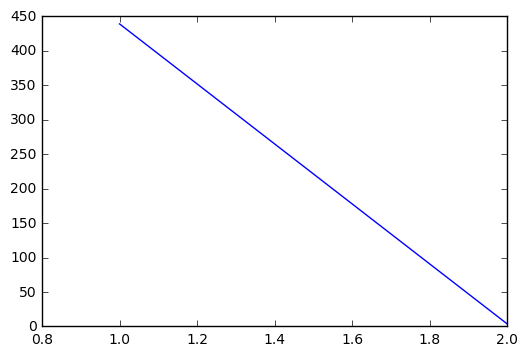

In [15]:
def Myfunction_NGD2(data, alpha, numIter, eplise):
    ''' Newton Gradient Descent -- theta := theta - [f'']^(-1)*f'
    :type data: array  
    :param data: contain x and y(label)
    :type step: int/float numeric
    :param step: length of step when update the theta
    :reference:http://www.doc88.com/p-145660070193.html
    :hessian = transpos(x) * x 
    '''
    nCol = data.shape[1]-1
    nRow = data.shape[0]
    print nCol
    print nRow
    x = data[:, :nCol]
    print x[1:5, :]
    z = np.ones(nRow).reshape(nRow, 1)
    x = np.hstack((z, x))  ## vstack merge like rbind in R; hstack like cbind in R;
    y = data[:, (nCol)].reshape(nRow, 1)
    #theta = np.random.random(nCol+1).reshape(nCol+1, 1)
    theta = np.ones(nCol+1).reshape(nCol+1, 1)
    i = 0
    costJ = []
    while i < numIter:
        H = np.dot(x,theta)
        J = (np.sum((y-H)**2))/(2*nRow)
        ## update
        #print('Itering %d ;cost is:%f' %(i+1,J))
        costJ.append(J)
        Gradient = (np.dot(np.transpose(y-H),x))/nRow
        #print 'gradient',Gradient
        #print 'x',x
        #print 'np.transpose(y-H)',np.transpose(y-H)
        Gradient = Gradient.reshape(nCol+1, 1)
        #eplise = 0.4
        if np.sum(np.fabs(Gradient)) <= eplise:
            return theta, costJ
        Hessian = np.dot(np.transpose(x), x)/nRow
        print 'hessian',Hessian
        theta = theta + np.dot(np.linalg.inv(Hessian), Gradient)
        i = i + 1
    return theta, costJ

num = 10000
#theta, costJ = Myfunction_BGD(dataArray, alpha=0.0005, numIter=num, eplise=0.4) ##
#theta, costJ = Myfunction_SGD(dataArray, alpha=0.00005, numIter=num, eplise=0.4)
#theta, costJ = Myfunction_NGD1(dataArray, alpha=0.0005, numIter=num, eplise=0.4) ## alpha is fixed ##
theta, costJ = Myfunction_NGD2(dataArray, alpha=0.0005, numIter=num, eplise=0.4) ## alpha is 1 ##
#theta, costJ = Myfunction_QNGD(dataArray, alpha=0.0005, numIter=num, eplise=0.4) ## alpha is searched ##
#theta, costJ = Myfunction_DFP1(dataArray, alpha=0.0005, numIter=num, eplise=0.4) ## alpha is fixed ##
#theta, costJ = Myfunction_DFP2(dataArray, alpha=0.0005, numIter=num, eplise=0.4) ## alpha is searched ##
#theta, costJ = Myfunction_BFGS1(dataArray, alpha=0.0005, numIter=num, eplise=0.4) ## alpha is fxied ##

print theta
klen = len(costJ)
leng = np.linspace(1, klen, klen)
plt.plot(leng, costJ)
plt.show()


1
89
[[ 2.]
 [ 3.]
 [ 4.]
 [ 5.]]
[[ 30.00437886]
 [  1.00674753]]


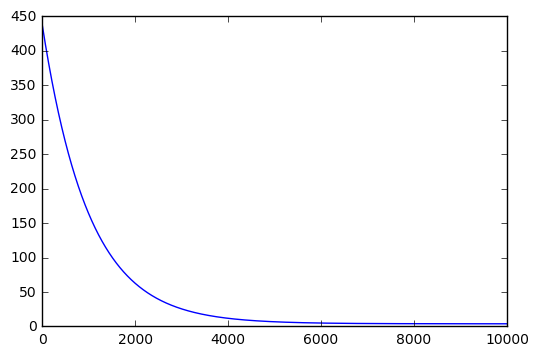

In [31]:
def Myfunction_NGD1(data, alpha, numIter, eplise):
    ''' Newton Gradient Descent -- theta := theta - alpha*[f'']^(-1)*f'
    :type data: array  
    :param data: contain x and y(label)
    :type step: int/float numeric
    :param step: length of step when update the theta
    :reference:http://www.doc88.com/p-145660070193.html
    :hessian = transpos(x) * x 
    '''
    nCol = data.shape[1]-1
    nRow = data.shape[0]
    print nCol
    print nRow
    x = data[:, :nCol]
    print x[1:5, :]
    z = np.ones(nRow).reshape(nRow, 1)
    x = np.hstack((z, x))  ## vstack merge like rbind in R; hstack like cbind in R;
    y = data[:, (nCol)].reshape(nRow, 1)
    #theta = np.random.random(nCol+1).reshape(nCol+1, 1)
    theta = np.ones(nCol+1).reshape(nCol+1, 1)
    i = 0
    costJ = []
    while i < numIter:
        H = np.dot(x,theta)
        J = (np.sum((y-H)**2))/(2*nRow)
        ## update
        #print('Itering %d ;cost is:%f' %(i+1,J))
        costJ.append(J)
        Gradient = (np.dot(np.transpose(y-H),x))/nRow
        Gradient = Gradient.reshape(nCol+1, 1)
        #eplise = 0.4
        if np.sum(np.fabs(Gradient))<=eplise:
            return theta, costJ
        Hessian = np.dot(np.transpose(x), x)/nRow
        theta = theta + alpha * np.dot(np.linalg.inv(Hessian), Gradient)
        #theta = theta + np.dot(np.linalg.inv(Hessian), Gradient)
        i = i + 1
    return theta, costJ

num = 10000

theta, costJ = Myfunction_NGD1(dataArray, alpha=0.0005, numIter=num, eplise=0.4) ## alpha is fixed ##

print theta
klen = len(costJ)
leng = np.linspace(1, klen, klen)
plt.plot(leng, costJ)
plt.show()


1
89
[[ 2.]
 [ 3.]
 [ 4.]
 [ 5.]]
Itering 1 ;cost is:439.173067
 find [a,b] loop is 1
f3 - f2 is -332.330361
 find [a,b] loop is 2
f3 - f2 is 24.280815
optimal alpha is -1.001437
Itering 2 ;cost is:3.839519
 find [a,b] loop is 1
f3 - f2 is -0.000753
 find [a,b] loop is 2
f3 - f2 is 0.000416
optimal alpha is -1.002461
Itering 3 ;cost is:3.838621
[[ 30.20078378]
 [  1.00679322]]


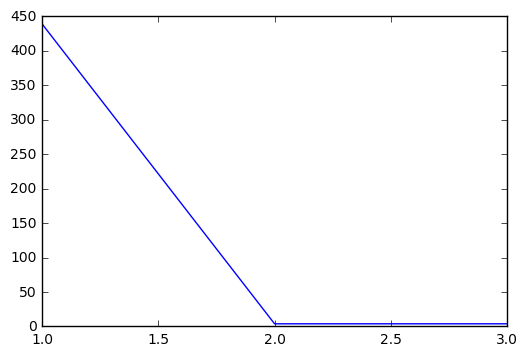

In [34]:
def Myfunction_QNGD(data, alpha, numIter, eplise):
    ''' Newton Gradient Descent -- theta := theta - alpha* [f'']^(-1)*f'--
            alpha is search by ForwardAndBack method and huang jin fen ge 
    :type data: array  
    :param data: contain x and y(label)
    :type step: int/float numeric
    :param step: length of step when update the theta
    :reference:http://www.doc88.com/p-145660070193.html
    :hessian = transpos(x) * x 
    '''
    nCol = data.shape[1]-1
    nRow = data.shape[0]
    print nCol
    print nRow
    x = data[:, :nCol]
    print x[1:5, :]
    z = np.ones(nRow).reshape(nRow, 1)
    x = np.hstack((z, x))  ## vstack merge like rbind in R; hstack like cbind in R;
    y = data[:, (nCol)].reshape(nRow, 1)
    #theta = np.random.random(nCol+1).reshape(nCol+1, 1)
    theta = np.ones(nCol+1).reshape(nCol+1, 1)
    i = 0
    costJ = []
    #eplise = 0.4
    while i < numIter:
        H = np.dot(x,theta)
        J = (np.sum((y-H)**2))/(2*nRow)
        ## update
        print('Itering %d ;cost is:%f' %(i+1,J))
        costJ.append(J)
        Gradient = (np.dot(np.transpose(y-H),x))/nRow
        Gradient = Gradient.reshape(nCol+1, 1)
        if np.sum(np.fabs(Gradient))<= eplise:
            return theta, costJ
        else:
            Hessian = np.dot(np.transpose(x), x)/nRow
            Dk = - np.dot(np.linalg.inv(Hessian), Gradient)
            ## find optimal [a,b] which contain optimal alpha
            ## optimal alpha lead to min{f(theta + alpha*DK)}
            alpha0 = 0
            h = np.random.random(1)
            alpha1 = alpha0
            alpha2 = alpha0 + h
            theta1 = theta + alpha1 * Dk
            theta2 = theta + alpha2 * Dk
            f1 = (np.sum((y-np.dot(x, theta1))**2))/(2*nRow)
            f2 = (np.sum((y-np.dot(x, theta2))**2))/(2*nRow)
            Loop = 1
            a = 0
            b = 0
            while Loop >0:
                print(' find [a,b] loop is %d' %Loop)
                Loop = Loop + 1
                if f1 > f2:
                    h = 2*h
                else:
                    h = -h
                    (alpha1, alpha2) = (alpha2, alpha1)
                    (f1, f2) = (f2, f1)
                alpha3 = alpha2 + h
                theta3 = theta + alpha3 * Dk
                f3 = (np.sum((y-np.dot(x, theta3))**2))/(2*nRow)
                print('f3 - f2 is %f' %(f3-f2))
                if f3 > f2:
                    a = min(alpha1, alpha3)
                    b = max(alpha1, alpha3)
                    break
                if f3 <= f2:
                    alpha1 = alpha2
                    alpha2 = alpha3
                    f1 = f2 
                    f2 = f3 
            ## find optiaml alpha in [a,b] using huang jin fen ge fa 
            e = 0.01
            while Loop >0:
                alpha1 = a + 0.382 * (b - a)
                alpha2 = a + 0.618 * (b - a)
                theta1 = theta + alpha1* Dk
                theta2 = theta + alpha2* Dk
                f1 = (np.sum((y-np.dot(x, theta1))**2))/(2*nRow)
                f2 = (np.sum((y-np.dot(x, theta2))**2))/(2*nRow)
                if f1 > f2:
                    a = alpha1
                if f1< f2:
                    b = alpha2
                if np.fabs(a-b) <= e:
                    alpha = (a+b)/2
                    break
            print('optimal alpha is %f' % alpha)
            theta = theta + alpha * Dk
        i = i + 1
    return theta, costJ

num = 10000

theta, costJ = Myfunction_QNGD(dataArray, alpha=0.0005, numIter=num, eplise=0.4) ## alpha is searched ##
#theta, costJ = Myfunction_DFP1(dataArray, alpha=0.0005, numIter=num, eplise=0.4) ## alpha is fixed ##
#theta, costJ = Myfunction_DFP2(dataArray, alpha=0.0005, numIter=num, eplise=0.4) ## alpha is searched ##
#theta, costJ = Myfunction_BFGS1(dataArray, alpha=0.0005, numIter=num, eplise=0.4) ## alpha is fxied ##

print theta
klen = len(costJ)
leng = np.linspace(1, klen, klen)
plt.plot(leng, costJ)
plt.show()


1
89
[[ 2.]
 [ 3.]
 [ 4.]
 [ 5.]]
 find [a,b] loop is 1
f3 - f2 is 802729742.246622
optimal alpha is -0.002938
Itering 1 ;cost is:15804.817150
 find [a,b] loop is 1
f3 - f2 is 8284.994740
optimal alpha is 1.002117
Itering 2 ;cost is:63.403432
 find [a,b] loop is 1
f3 - f2 is -25.397078
 find [a,b] loop is 2
f3 - f2 is -16.689874
 find [a,b] loop is 3
f3 - f2 is 103.037381
optimal alpha is 4.059611
Itering 3 ;cost is:3.952939
[[ 30.13589842]
 [  1.01708934]]


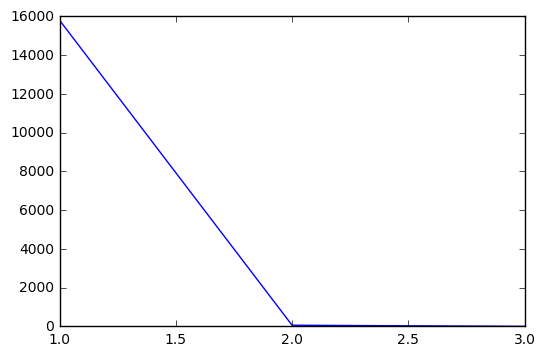

In [36]:
def Myfunction_DFP2(data, alpha, numIter, eplise):
    ''' DFP -- theta := theta + alpha * Dk 
              --alpha is searched by huangjin method 
              --satisfied argmin{f(theta+alpha*Dk)}##
    :type data: array  
    :param data: contain x and y(label)
    :type step: int/float numeric
    :param step: length of step when update the theta
    :reference:http://blog.pfan.cn/miaowei/52925.html
    :reference:http://max.book118.com/html/2012/1025/3119007.shtm ## important ##
    :hessian is estimated by DFP method.
    '''
    nCol = data.shape[1]-1
    nRow = data.shape[0]
    print nCol
    print nRow
    x = data[:, :nCol]
    print x[1:5, :]
    z = np.ones(nRow).reshape(nRow, 1)
    x = np.hstack((z, x))  ## vstack merge like rbind in R; hstack like cbind in R;
    y = data[:, (nCol)].reshape(nRow, 1)
    #theta = np.random.random(nCol+1).reshape(nCol+1, 1)
    theta = np.ones(nCol+1).reshape(nCol+1, 1)
    i = 0
    costJ = []
    Hessian = np.eye(nCol+1)
    H = np.dot(x,theta)
    J = (np.sum((y-H)**2))/(2*nRow)
    #costJ.append(J)
    Gradient = (np.dot(np.transpose(y-H),x))/nRow
    Gradient = Gradient.reshape(nCol+1, 1)
    Dk = - Gradient
    #eplise = 0.4
    while i < numIter:
        if(np.sum(np.fabs(Dk)) <= eplise ): ## stop condition ##
            return theta, costJ
        else:
            ## find alpha that min f(thetaK + alpha * Dk)
            ## find optimal [a,b] which contain optimal alpha
            ## optimal alpha lead to min{f(theta + alpha*DK)}
            alpha0 = 0
            h = np.random.random(1)
            alpha1 = alpha0
            alpha2 = alpha0 + h
            theta1 = theta + alpha1 * Dk
            theta2 = theta + alpha2 * Dk
            f1 = (np.sum((y-np.dot(x, theta1))**2))/(2*nRow)
            f2 = (np.sum((y-np.dot(x, theta2))**2))/(2*nRow)
            Loop = 1
            a = 0
            b = 0
            while Loop >0:
                print(' find [a,b] loop is %d' %Loop)
                Loop = Loop + 1
                if f1 > f2:
                    h = 2*h
                else:
                    h = -h
                    (alpha1, alpha2) = (alpha2, alpha1)
                    (f1, f2) = (f2, f1)
                alpha3 = alpha2 + h
                theta3 = theta + alpha3 * Dk
                f3 = (np.sum((y-np.dot(x, theta3))**2))/(2*nRow)
                print('f3 - f2 is %f' %(f3-f2))
                if f3 > f2:
                    a = min(alpha1, alpha3)
                    b = max(alpha1, alpha3)
                    break
                if f3 <= f2:
                    alpha1 = alpha2
                    alpha2 = alpha3
                    f1 = f2 
                    f2 = f3
            ## find optiaml alpha in [a,b] using huang jin fen ge fa 
            e = 0.01
            while Loop >0:
                alpha1 = a + 0.382 * (b - a)
                alpha2 = a + 0.618 * (b - a)
                theta1 = theta + alpha1* Dk
                theta2 = theta + alpha2* Dk
                f1 = (np.sum((y-np.dot(x, theta1))**2))/(2*nRow)
                f2 = (np.sum((y-np.dot(x, theta2))**2))/(2*nRow)
                if f1 > f2:
                    a = alpha1
                if f1< f2:
                    b = alpha2
                if np.fabs(a-b) <= e:
                    alpha = (a+b)/2
                    break
            print('optimal alpha is %f' % alpha)

            theta_old = theta
            theta = theta + alpha * Dk
            ## update the Hessian matrix ##
            H = np.dot(x,theta)
            J = (np.sum((y-H)**2))/(2*nRow)
            ## update 
            print('Itering %d ;cost is:%f' %(i+1,J))
            costJ.append(J)
            # here to estimate Hessian'inv #
            # sk = ThetaNew - ThetaOld = alpha * inv(H) * Gradient
            sk = theta - theta_old
            #yk = DelX(k+1) - DelX(k)
            DelXK = - (np.dot(np.transpose(y-np.dot(x, theta)),x))/nRow
            DelXk = - (np.dot(np.transpose(y-np.dot(x, theta_old)),x))/nRow
            yk = (DelXK - DelXk).reshape(nCol+1, 1)
            #z1 = (sk * sk') # a matrix
            #z2 = (sk' * yk) # a value
            z1 = sk * np.transpose(sk)
            z2 = np.dot(np.transpose(sk),yk)
            #z3 = (H * yk * yk' * H) # a matrix
            #z4 = (yk' * H * yk) # a value
            z3 = np.dot(np.dot(np.dot(Hessian, yk), np.transpose(yk)), Hessian)
            z4 = np.dot(np.dot(np.transpose(yk), Hessian),yk)
            DHessian = z1/z2 - z3/z4
            Hessian = Hessian + DHessian
            Dk = - np.dot(Hessian, DelXK.reshape(nCol+1,1))


        i = i + 1
    return theta, costJ

num = 10000

theta, costJ = Myfunction_DFP2(dataArray, alpha=0.0005, numIter=num, eplise=0.4) ## alpha is fixed ##

print theta
klen = len(costJ)
leng = np.linspace(1, klen, klen)
plt.plot(leng, costJ)
plt.show()

1
89
[[ 2.]
 [ 3.]
 [ 4.]
 [ 5.]]
[[ 29.81001001]
 [  0.99781413]]


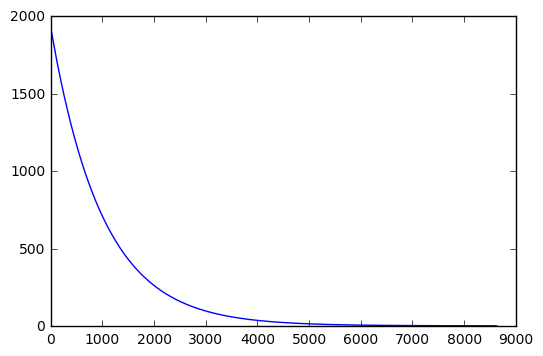

In [6]:
def Myfunction_DFP1(data, alpha, numIter, eplise):
    ''' DFP -- theta := theta + alpha * Dk
               alpha is fixed ##
    :type data: array 
    :param data: contain x and y(label) 
    :type step: int/float numeric
    :param step: length of step when update the theta
    :reference:http://blog.pfan.cn/miaowei/52925.html
    :reference:http://max.book118.com/html/2012/1025/3119007.shtm ## important ##
    :hessian is estimated by DFP method.
    '''
    nCol = data.shape[1]-1
    nRow = data.shape[0]
    print nCol
    print nRow
    x = data[:, :nCol]
    print x[1:5, :]
    z = np.ones(nRow).reshape(nRow, 1)
    x = np.hstack((z, x))  ## vstack merge like rbind in R; hstack like cbind in R;
    y = data[:, (nCol)].reshape(nRow, 1)
    #theta = np.random.random(nCol+1).reshape(nCol+1, 1)
    theta = np.ones(nCol+1).reshape(nCol+1, 1)
    i = 0
    costJ = []
    Hessian = np.eye(nCol+1)
    H = np.dot(x,theta)
    J = (np.sum((y-H)**2))/(2*nRow)
    #costJ.append(J)
    Gradient = (np.dot(np.transpose(y-H),x))/nRow
    Gradient = Gradient.reshape(nCol+1, 1)
    Dk = - Gradient
    #eplise = 0.4
    while i < numIter:
        if(np.sum(np.fabs(Dk)) <= eplise ): ## stop condition ##
            return theta, costJ
        else:
            ## find alpha that min f(thetaK + alpha * Dk)
            ## here for simple alpha is parameter 'alpha'
            alpha = alpha
            theta_old = theta
            theta = theta + alpha * Dk
            ## update the Hessian matrix ##
            H = np.dot(x,theta)
            J = (np.sum((y-H)**2))/(2*nRow)
            ## update 
            #print('Itering %d ;cost is:%f' %(i+1,J))
            costJ.append(J)
            # here to estimate Hessian'inv #
            # sk = ThetaNew - ThetaOld = alpha * inv(H) * Gradient
            sk = theta - theta_old
            #yk = DelX(k+1) - DelX(k)
            DelXK = - (np.dot(np.transpose(y-np.dot(x, theta)),x))/nRow
            DelXk = - (np.dot(np.transpose(y-np.dot(x, theta_old)),x))/nRow
            yk = (DelXK - DelXk).reshape(nCol+1, 1)
            #z1 = (sk * sk') # a matrix
            #z2 = (sk' * yk) # a value
            z1 = sk * np.transpose(sk)
            z2 = np.dot(np.transpose(sk),yk)
            #z3 = (H * yk * yk' * H) # a matrix
            #z4 = (yk' * H * yk) # a value
            z3 = np.dot(np.dot(np.dot(Hessian, yk), np.transpose(yk)), Hessian)
            z4 = np.dot(np.dot(np.transpose(yk), Hessian),yk)
            DHessian = z1/z2 - z3/z4
            Hessian = Hessian + DHessian
            Dk = - np.dot(Hessian, DelXK.reshape(nCol+1,1))
            i = i + 1
    return theta, costJ

num = 10000

theta, costJ = Myfunction_DFP1(dataArray, alpha=0.0005, numIter=num, eplise=0.4) ## alpha is fixed ##

print theta
klen = len(costJ)
leng = np.linspace(1, klen, klen)
plt.plot(leng, costJ)
plt.show()

1
89
[[ 2.]
 [ 3.]
 [ 4.]
 [ 5.]]
gradient [[   29.50658292  1332.27977129]]
[[ 29.81001807]
 [  0.99781399]]


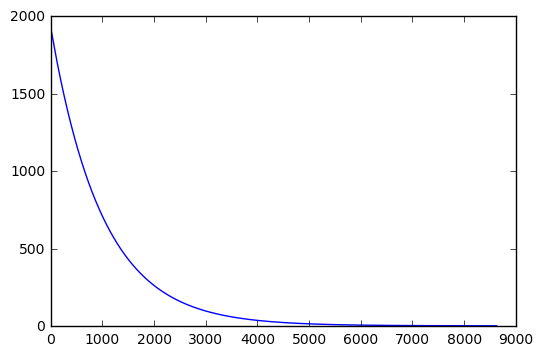

In [26]:
def Myfunction_BFGS1(data, alpha, numIter, eplise):
    ''' BFGS 
    :type data: array  
    :param data: contain x and y(label)
    :type step: int/float numeric
    :param step: length of step when update the theta
    :reference:http://blog.pfan.cn/miaowei/52925.html
    :reference:http://max.book118.com/html/2012/1025/3119007.shtm ## important ##
    :hessian is estimated by BFGS method.
    '''
    nCol = data.shape[1]-1
    nRow = data.shape[0]
    print nCol
    print nRow
    x = data[:, :nCol]
    print x[1:5, :]
    z = np.ones(nRow).reshape(nRow, 1)
    x = np.hstack((z, x))  ## vstack merge like rbind in R; hstack like cbind in R;
    y = data[:, (nCol)].reshape(nRow, 1)
    #theta = np.random.random(nCol+1).reshape(nCol+1, 1)
    theta = np.ones(nCol+1).reshape(nCol+1, 1)
    i = 0
    costJ = []
    Hessian = np.eye(nCol+1)
    H = np.dot(x,theta)
    J = (np.sum((y-H)**2))/(2*nRow)
    #costJ.append(J)
    Gradient = (np.dot(np.transpose(y-H),x))/nRow
    print 'gradient',Gradient
    Gradient = Gradient.reshape(nCol+1, 1)
    Dk = - Gradient
    #eplise = 0.4
    while i < numIter:
        if(np.sum(np.fabs(Dk)) <= eplise ): ## stop condition ##
            return theta, costJ
        else:
            ## find alpha that min J(thetaK + alpha * Dk)
            ## here for simple alpha is parameter 'alpha'
            alpha = alpha
            theta_old = theta
            theta = theta + alpha * Dk
            ## update the Hessian matrix ##
            H = np.dot(x,theta)
            J = (np.sum((y-H)**2))/(2*nRow)
            ## update 
            #print('Itering %d ;cost is:%f' %(i+1,J))
            costJ.append(J)
            # here to estimate Hessian #
            # sk = ThetaNew - ThetaOld = alpha * inv(H) * Gradient
            sk = theta - theta_old
            #yk = DelX(k+1) - DelX(k)
            DelXK = - (np.dot(np.transpose(y-np.dot(x, theta)),x))/nRow
            DelXk = - (np.dot(np.transpose(y-np.dot(x, theta_old)),x))/nRow
            yk = (DelXK - DelXk).reshape(nCol+1, 1)
            #z1 = yk' * H * yk # a value
            #z2 = (sk' * yk) # a value
            z1 = np.dot(np.dot(np.transpose(yk), Hessian), yk)
            z2 = np.dot(np.transpose(sk),yk)
            #print 'z2',z2
            #print 'np.transpose(sk)',np.transpose(sk)
            #print 'yk',yk
            #print 'test',np.dot(sk,yk)
            #z3 = sk * sk' # a matrix
            #z4 = sk * yk' * H # a matrix
            z3 = np.dot(sk, np.transpose(sk))
            #z4 = np.dot(np.dot(sk, np.transpose(yk)), Hessian)
            #print 'z4',z4,
            #print 'np.dot(np.dot(Hessian,yk),sk)',np.dot(np.dot(Hessian,yk),np.transpose(sk))
            z4 = np.dot(np.dot(sk, np.transpose(yk)), Hessian) + np.dot(np.dot(Hessian,yk),np.transpose(sk))
            DHessian = (1+z1/z2) * (z3/z2) - z4/z2
            Hessian = Hessian + DHessian
            Dk = - np.dot(Hessian, DelXK.reshape(nCol+1,1))
            i = i + 1
    return theta, costJ

## test ##

num = 10000

theta, costJ = Myfunction_BFGS1(dataArray, alpha=0.0005, numIter=num, eplise=0.4) ## alpha is fxied ##
print theta
klen = len(costJ)
leng = np.linspace(1, klen, klen)
plt.plot(leng, costJ)
plt.show()

1
89
[[ 2.]
 [ 3.]
 [ 4.]
 [ 5.]]
[[ 29.81001807]
 [  0.99781399]]


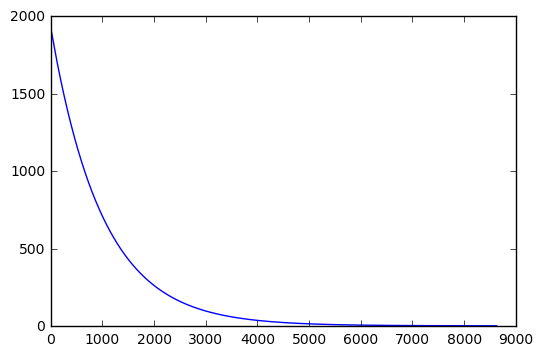

In [28]:
def Myfunction_BFGS2(data, alpha, numIter, eplise):
    ''' BFGS 
    :type data: array  
    :param data: contain x and y(label)
    :type step: int/float numeric
    :param step: length of step when update the theta
    :reference:http://blog.pfan.cn/miaowei/52925.html
    :reference:http://max.book118.com/html/2012/1025/3119007.shtm ## important ##
    :hessian is estimated by BFGS method.
    '''
    nCol = data.shape[1]-1
    nRow = data.shape[0]
    print nCol
    print nRow
    x = data[:, :nCol]
    print x[1:5, :]
    z = np.ones(nRow).reshape(nRow, 1)
    x = np.hstack((z, x))  ## vstack merge like rbind in R; hstack like cbind in R;
    y = data[:, (nCol)].reshape(nRow, 1)
    #theta = np.random.random(nCol+1).reshape(nCol+1, 1)
    theta = np.ones(nCol+1).reshape(nCol+1, 1)
    i = 0
    costJ = []
    Hessian = np.eye(nCol+1)
    H = np.dot(x,theta)
    J = (np.sum((y-H)**2))/(2*nRow)
    #costJ.append(J)
    Gradient = (np.dot(np.transpose(y-H),x))/nRow
    Gradient = Gradient.reshape(nCol+1, 1)
    Dk = - Gradient
    #eplise = 0.4
    while i < numIter:
        if(np.sum(np.fabs(Dk)) <= eplise ): ## stop condition ##
            return theta, costJ
        else:
            ## find alpha that min J(thetaK + alpha * Dk)
            alpha = alpha
            ## find optimal [a,b] which contain optimal alpha
            ## optimal alpha lead to min{f(theta + alpha*DK)}
            '''
            alpha0 = 0
            h = np.random.random(1)
            alpha1 = alpha0
            alpha2 = alpha0 + h
            theta1 = theta + alpha1 * Dk
            theta2 = theta + alpha2 * Dk
            f1 = (np.sum((y-np.dot(x, theta1))**2))/(2*nRow)
            f2 = (np.sum((y-np.dot(x, theta2))**2))/(2*nRow)
            Loop = 1
            a = 0
            b = 0
            while Loop >0:
                print(' find [a,b] loop is %d' %Loop)
                Loop = Loop + 1
                if f1 > f2:
                    h = 2*h
                else:
                    h = -h
                    (alpha1, alpha2) = (alpha2, alpha1)
                    (f1, f2) = (f2, f1)
                alpha3 = alpha2 + h
                theta3 = theta + alpha3 * Dk
                f3 = (np.sum((y-np.dot(x, theta3))**2))/(2*nRow)
                print('f3 - f2 is %f' %(f3-f2))
                if f3 > f2:
                    a = min(alpha1, alpha3)
                    b = max(alpha1, alpha3)
                    break
                if f3 <= f2:
                    alpha1 = alpha2
                    alpha2 = alpha3
                    f1 = f2 
                    f2 = f3
            ## find optiaml alpha in [a,b] using huang jin fen ge fa 
            e = 0.01
            while Loop >0:
                alpha1 = a + 0.382 * (b - a)
                alpha2 = a + 0.618 * (b - a)
                theta1 = theta + alpha1* Dk
                theta2 = theta + alpha2* Dk
                f1 = (np.sum((y-np.dot(x, theta1))**2))/(2*nRow)
                f2 = (np.sum((y-np.dot(x, theta2))**2))/(2*nRow)
                if f1 > f2:
                    a = alpha1
                if f1< f2:
                    b = alpha2
                if np.fabs(a-b) <= e:
                    alpha = (a+b)/2
                    break
            print('optimal alpha is %f' % alpha)
            '''
            ## Get Dk and update Hessian
            theta_old = theta
            theta = theta + alpha * Dk
            ## update the Hessian matrix ##
            H = np.dot(x,theta)
            J = (np.sum((y-H)**2))/(2*nRow)
            ## update 
            #print('Itering %d ;cost is:%f' %(i+1,J))
            costJ.append(J)
            # here to estimate Hessian #
            # sk = ThetaNew - ThetaOld = alpha * inv(H) * Gradient
            sk = theta - theta_old
            #yk = DelX(k+1) - DelX(k)
            DelXK = - (np.dot(np.transpose(y-np.dot(x, theta)),x))/nRow
            DelXk = - (np.dot(np.transpose(y-np.dot(x, theta_old)),x))/nRow
            yk = (DelXK - DelXk).reshape(nCol+1, 1)
            #z1 = yk' * H * yk # a value
            #z2 = (sk' * yk) # a value
            z1 = np.dot(np.dot(np.transpose(yk), Hessian), yk)
            z2 = np.dot(np.transpose(sk),yk)
            #z3 = sk * sk' # a matrix
            #z4 = sk * yk' * H # a matrix
            z3 = np.dot(sk, np.transpose(sk))
            z4 = np.dot(np.dot(sk, np.transpose(yk)), Hessian) + np.dot(np.dot(Hessian,yk),np.transpose(sk))
            DHessian = (1+z1/z2) * (z3/z2) - z4/z2
            Hessian = Hessian + DHessian
            Dk = - np.dot(Hessian, DelXK.reshape(nCol+1,1))
            i = i + 1
    return theta, costJ

## test ##

num = 10000

theta, costJ = Myfunction_BFGS2(dataArray, alpha=0.0005, numIter=num, eplise=0.4) ## alpha is fxied ##
print theta
klen = len(costJ)
leng = np.linspace(1, klen, klen)
plt.plot(leng, costJ)
plt.show()